#### Customer Satisfaction Prediction

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import joblib


from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [2]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
# Load datasets
train_df = pd.read_csv('../../raw_dataset/train.csv')
test_df = pd.read_csv('../../raw_dataset/test.csv')

In [4]:
# View first 5 rows of train dataset
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
# Data Cleaning
# Check for missing values	
train_df = train_df.drop(columns=['Unnamed: 0'])
test_df = test_df.drop(columns=['Unnamed: 0'])

In [6]:
# Data Preprocessing
# Access rows with missing values from column
# Variable Arrival Delay in Minutes has NAN values representing no Delay
# Assign 0 to say 0 minutes of Delay
print(train_df.isna().sum(axis=0))
print(train_df.isna().sum(axis=0))

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64
id 

In [7]:
# Drop rows with missing values
train_df=train_df.dropna(axis=0)
test_df=test_df.dropna(axis=0)

In [8]:
# Fillna
train_df['Arrival Delay in Minutes'] = train_df['Arrival Delay in Minutes'].fillna(0)
test_df['Arrival Delay in Minutes'] = test_df['Arrival Delay in Minutes'].fillna(0)

In [9]:
# View unique categories in categorical columns
print(train_df['Customer Type'].value_counts())
print(train_df['Type of Travel'].value_counts())
print(train_df['Class'].value_counts())


Customer Type
Loyal Customer       84662
disloyal Customer    18932
Name: count, dtype: int64
Type of Travel
Business travel    71465
Personal Travel    32129
Name: count, dtype: int64
Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64


In [10]:
# Define a  mapping dictionary for all categorical columns
mapping = {
    'Gender': {'Male': 0, 'Female': 1},
    'satisfaction': {'satisfied': 1, 'neutral or dissatisfied': 0},
    'Customer Type':{'Loyal Customer':1,'disloyal Customer':0},
    'Type of Travel':{'Business travel':1,'Personal Travel':0},
    'Class':{'Business':2,'Eco Plus':1,'Eco':0}

}

In [11]:
# Loop through the columns and apply the mapping
for col, col_mapping in mapping.items():
    train_df[col] = train_df[col].map(col_mapping)
    test_df[col] = test_df[col].map(col_mapping)

In [12]:
# Drop id column
train_df= train_df.drop(columns='id')
test_df= test_df.drop(columns='id')

In [13]:
# Define features to scale
features_to_scale =['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [14]:
# Feature Selection
# All features will be taken into consideratio
scaler = StandardScaler()
# Apply Standard Scaler
scaled_train = scaler.fit_transform(train_df[features_to_scale])
scaled_test = scaler.transform(test_df[features_to_scale])

In [15]:
# Convert scaled features to dataframe
train_df[features_to_scale]= scaled_train
test_df[features_to_scale]= scaled_test

In [16]:
# Split train and test into X Features and y Target
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]



In [17]:
# Save the processed data to csv
train_processed = pd.concat([X_train, y_train], axis=1)
test_processed = X_test

train_file_path = 'train_data.csv'

test_file_path = 'test_data.csv'

train_processed.to_csv(train_file_path, index=False)
test_processed.to_csv(test_file_path, index=False)


In [18]:
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_preds = logreg_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_preds))
print(classification_report(y_test, logreg_preds))


Logistic Regression Accuracy: 0.8714324334762291
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14528
           1       0.87      0.83      0.85     11365

    accuracy                           0.87     25893
   macro avg       0.87      0.87      0.87     25893
weighted avg       0.87      0.87      0.87     25893



In [19]:
# Save the model as a pickle file
joblib.dump(logreg_model ,"../../saved_models/LogisticRegressionModel.pkl")


['../../saved_models/LogisticRegressionModel.pkl']

In [20]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.9636581315413432
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



In [21]:
# Save the model as a pickle file
joblib.dump(rf_model ,"../../saved_models/RandomForestModel.pkl")

['../../saved_models/RandomForestModel.pkl']

In [22]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))
print(classification_report(y_test, gb_preds))


Gradient Boosting Accuracy: 0.9419920441818252
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14528
           1       0.95      0.92      0.93     11365

    accuracy                           0.94     25893
   macro avg       0.94      0.94      0.94     25893
weighted avg       0.94      0.94      0.94     25893



In [23]:
# Save the model as a pickle file
joblib.dump(gb_model ,"../../saved_models/GradientBoostingModel.pkl")


['../../saved_models/GradientBoostingModel.pkl']

In [24]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

SVM Accuracy: 0.9528057776232959
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14528
           1       0.96      0.93      0.95     11365

    accuracy                           0.95     25893
   macro avg       0.95      0.95      0.95     25893
weighted avg       0.95      0.95      0.95     25893



In [25]:
# Save the model as a pickle file
joblib.dump(svm_model ,"../../saved_models/SupportVectorMachinesModel.pkl")


['../../saved_models/SupportVectorMachinesModel.pkl']

In [26]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds))


Naive Bayes Accuracy: 0.8617773143320588
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     14528
           1       0.86      0.82      0.84     11365

    accuracy                           0.86     25893
   macro avg       0.86      0.86      0.86     25893
weighted avg       0.86      0.86      0.86     25893



In [27]:
# Save the model as a pickle file
joblib.dump(nb_model ,"../../saved_models/NaiveBayesModel.pkl")


['../../saved_models/NaiveBayesModel.pkl']

In [28]:
# Evaluation of Models using Confusion Matrix
lr_model_cm = confusion_matrix(y_test, logreg_preds)

In [29]:
# Random Forest
rf_model_cm = confusion_matrix(y_test, rf_preds)

In [30]:
# Gradient Boosting
gb_model_cm = confusion_matrix(y_test, gb_preds)

In [31]:
# Support Vector Machine (SVM)
svm_model_cm = confusion_matrix(y_test, svm_preds)

In [32]:
# Naive Bayes
nb_model_cm = confusion_matrix(y_test, nb_preds)

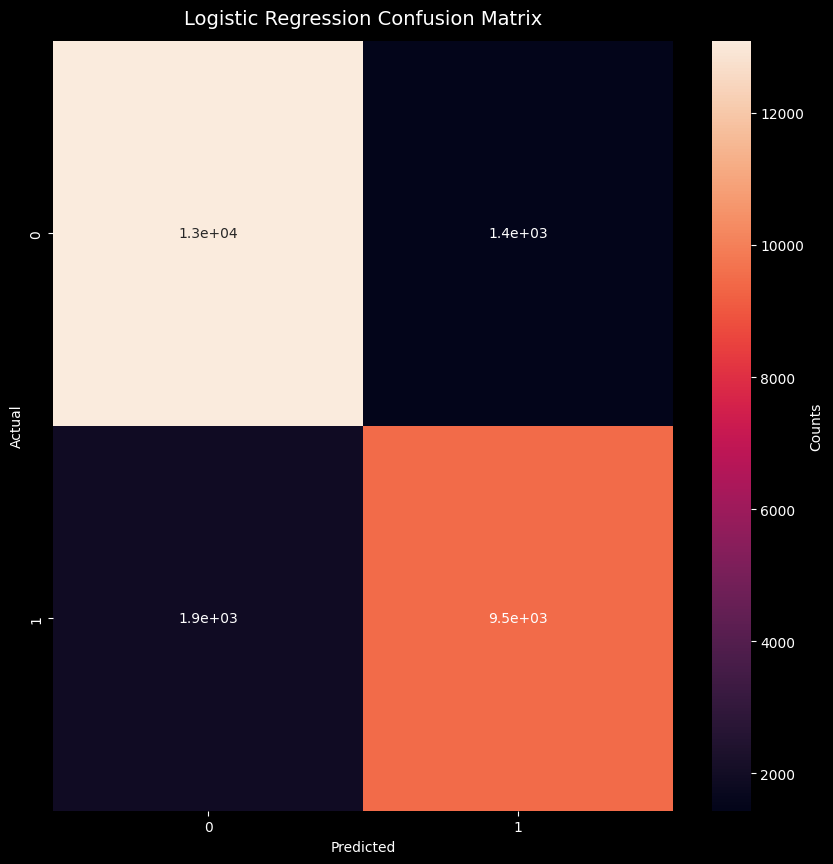

In [33]:
# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(10, 10))
plt.title('Logistic Regression Confusion Matrix', fontdict={'fontsize':14}, pad=12)
sns.heatmap(lr_model_cm,cbar_kws={'label': 'Counts'},annot=True )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

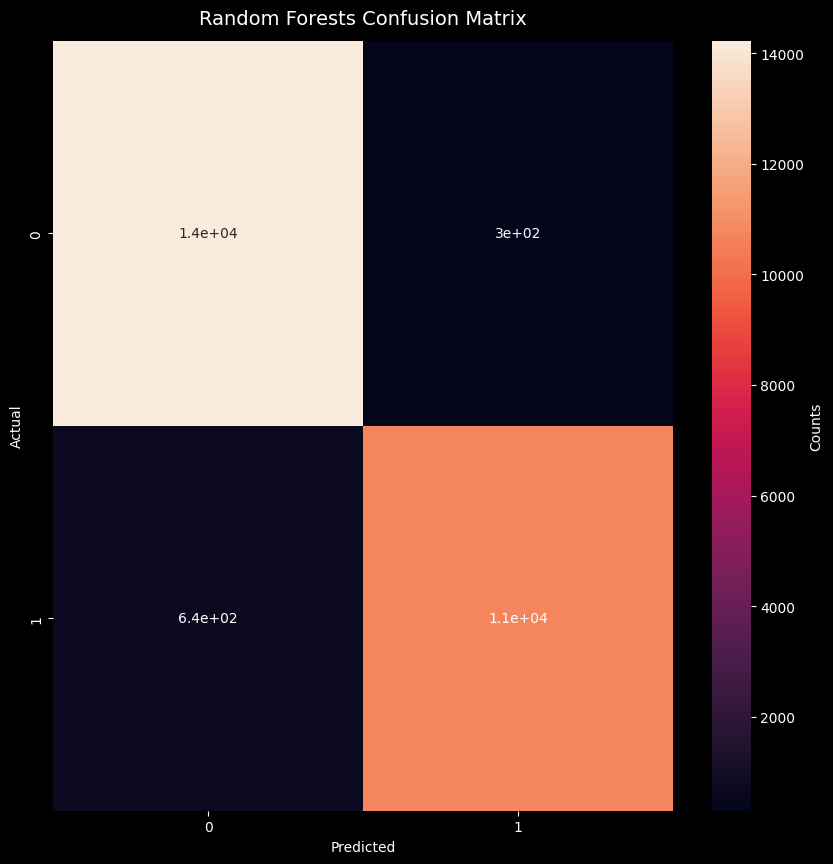

In [34]:
# Plot confusion matrix for Random Forest
plt.figure(figsize=(10, 10))
plt.title('Random Forests Confusion Matrix', fontdict={'fontsize':14}, pad=12)
sns.heatmap(rf_model_cm,cbar_kws={'label': 'Counts'},annot=True )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


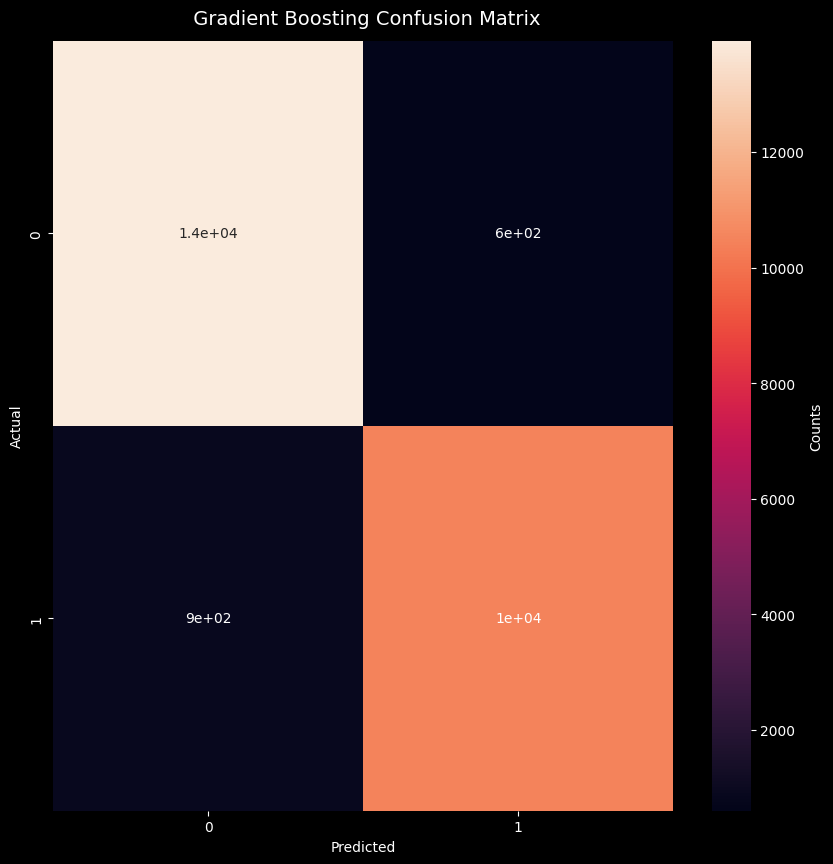

In [35]:
# Plot confusion matrix for Gradient Boosting
plt.figure(figsize=(10, 10))
plt.title(' Gradient Boosting Confusion Matrix', fontdict={'fontsize':14}, pad=12)
sns.heatmap(gb_model_cm,cbar_kws={'label': 'Counts'},annot=True )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


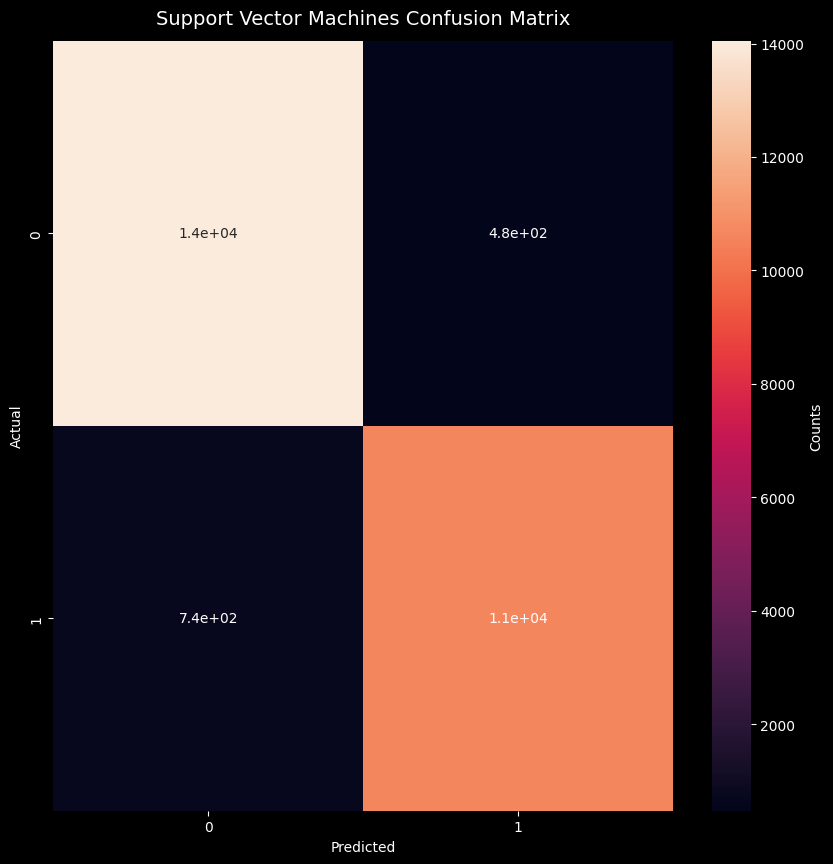

In [36]:
# Plot confusion matrix for SVM
plt.figure(figsize=(10, 10))
plt.title('Support Vector Machines Confusion Matrix', fontdict={'fontsize':14}, pad=12)
sns.heatmap(svm_model_cm,cbar_kws={'label': 'Counts'},annot=True )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

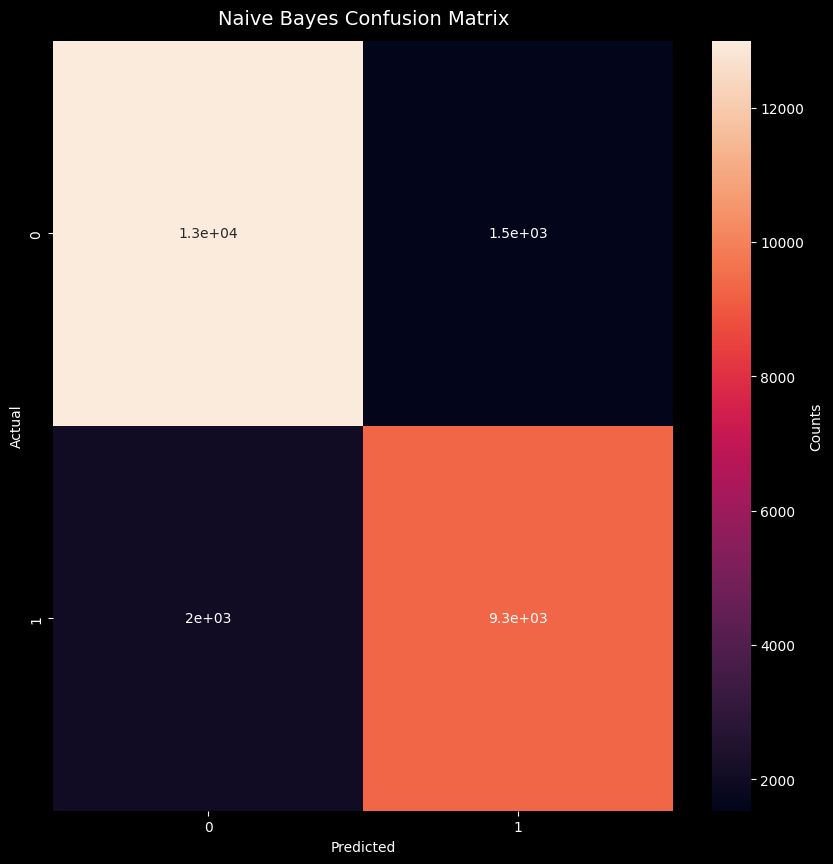

In [37]:
# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(10, 10))
plt.title('Naive Bayes Confusion Matrix', fontdict={'fontsize':14}, pad=12)
sns.heatmap(nb_model_cm,cbar_kws={'label': 'Counts'},annot=True )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
# Evaluation of Models using classification scores
# Logistic Regression
print('Scores for Logistic Regression')
print("precision score",precision_score(y_test,logreg_preds))
print("recall score",recall_score(y_test,  logreg_preds))
print("f1 score",f1_score(y_test,logreg_preds))


Scores for Logistic Regression
precision score 0.868421052631579
recall score 0.8333479982402112
f1 score 0.8505231017915675


In [39]:
# Random Forest
print('Scores for Random Forest')
print("precision score",precision_score(y_test,rf_preds))
print("recall score",recall_score(y_test,rf_preds))
print("f1 score",f1_score(y_test,rf_preds))

Scores for Random Forest
precision score 0.9728724369442933
recall score 0.9435107787065552
f1 score 0.9579666770893822


In [40]:
# Gradient Boosting
print('Scores for Gradient Boosting')
print("precision score",precision_score(y_test,gb_preds))
print("recall score",recall_score(y_test,gb_preds))
print("f1 score",f1_score(y_test,gb_preds))


Scores for Gradient Boosting
precision score 0.9455235341945976
recall score 0.9208974923009239
f1 score 0.9330480520638318


In [41]:
# Support Vector Machine (SVM)
print('Scores for Support Vector Machines')
print("precision score",precision_score(y_test,svm_preds))
print("recall score",recall_score(y_test,svm_preds))
print("f1 score",f1_score(y_test,svm_preds))


Scores for Support Vector Machines
precision score 0.956850734168093
recall score 0.9346238451385833
f1 score 0.9456066945606694


In [42]:
# Naive Bayes
print('Scores for Naive Bayes')
print("precision score",precision_score(y_test,nb_preds))
print("recall score",recall_score(y_test,nb_preds))
print("f1 score",f1_score(y_test,nb_preds))

Scores for Naive Bayes
precision score 0.8589341692789969
recall score 0.8197096348438188
f1 score 0.8388636261311964


In [43]:
# Set plt style to default
plt.style.use('default')

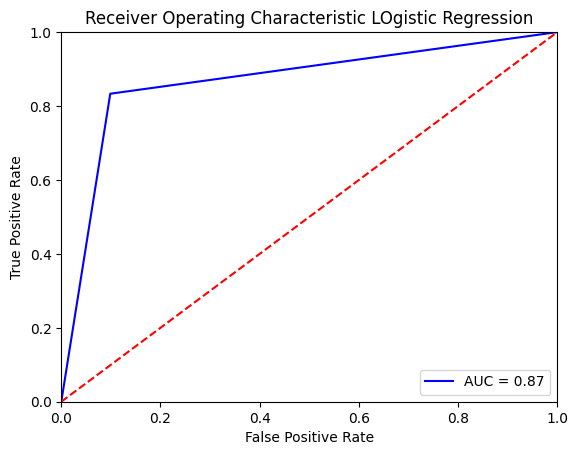

In [44]:
# Plot ROC curve for Logistic Regression
fpr, tpr, threshold = roc_curve(y_test, logreg_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic LOgistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

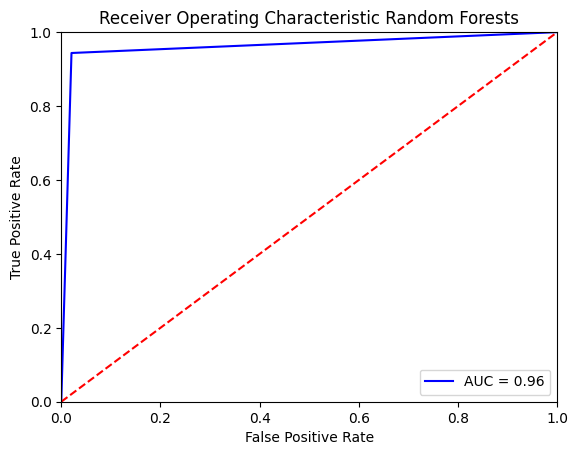

In [45]:
# Plot ROC curve for Random Forest
fpr, tpr, threshold = roc_curve(y_test, rf_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic Random Forests')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

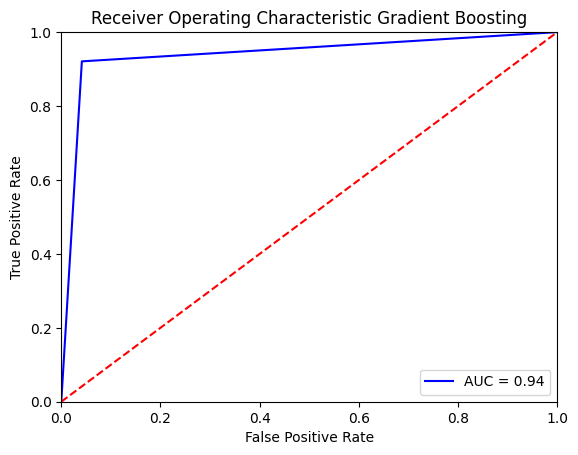

In [46]:
# Plot ROC curve for Gradient Boosting
fpr, tpr, threshold = roc_curve(y_test, gb_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic Gradient Boosting')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

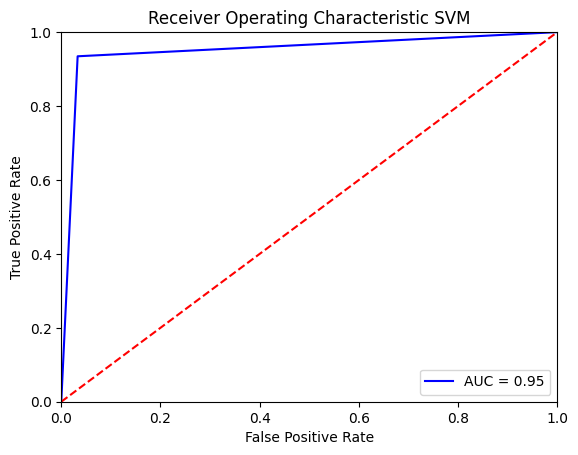

In [47]:
# Plot ROC curve for SVM
fpr, tpr, threshold = roc_curve(y_test, svm_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic SVM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

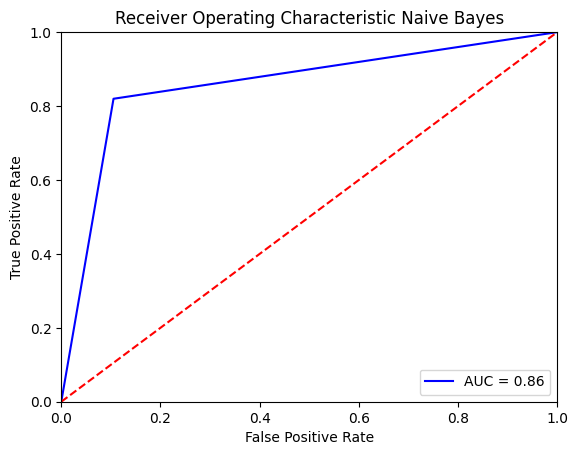

In [48]:
# Plot ROC curve for Naive Bayes
fpr, tpr, threshold = roc_curve(y_test, nb_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()